# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


In [6]:
cell_img = plt.imread('data/cells.png')
cell_img.resize(256, 256)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [7]:
cell_ft = np.fft.fft2(cell_img)
cell_ft.dtype
print(cell_ft)


[[11685.81206986   +0.j           221.81293616+1929.3298152j
    453.94366721 +893.59699332j ...   147.80395428 -741.65769559j
    453.94366721 -893.59699332j   221.81293616-1929.3298152j ]
 [  640.65369518+1743.27501325j  -468.32903475  +11.6059259j
   -134.38933485 +144.89419543j ...    80.21990743 +793.66307135j
  -1116.77408501 +120.6375587j    167.25766634 -366.89397839j]
 [   38.3429718  +968.67376955j  -271.75873723  -91.48240371j
   -129.22335712 -250.70253948j ...  -145.85923315 -332.9757022j
    -57.56715282 -235.76837929j   439.44348519  -15.04998787j]
 ...
 [  -12.16817252 -853.5050427j    165.4361805  -101.96027274j
   -218.26727819  -28.30771319j ...  -163.93743719  -85.00974182j
   -246.50978438  +31.85212838j  -142.09256992 -253.20664124j]
 [   38.3429718  -968.67376955j   439.44348519  +15.04998787j
    -57.56715282 +235.76837929j ...   -28.69301166 +222.9923923j
   -129.22335712 +250.70253948j  -271.75873723  +91.48240371j]
 [  640.65369518-1743.27501325j   167.257666

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [11]:
print(cell_ft.real)
print(cell_ft.imag)

amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)
print(amplitude)
print(phase)

[[11685.81206986   221.81293616   453.94366721 ...   147.80395428
    453.94366721   221.81293616]
 [  640.65369518  -468.32903475  -134.38933485 ...    80.21990743
  -1116.77408501   167.25766634]
 [   38.3429718   -271.75873723  -129.22335712 ...  -145.85923315
    -57.56715282   439.44348519]
 ...
 [  -12.16817252   165.4361805   -218.26727819 ...  -163.93743719
   -246.50978438  -142.09256992]
 [   38.3429718    439.44348519   -57.56715282 ...   -28.69301166
   -129.22335712  -271.75873723]
 [  640.65369518   167.25766634 -1116.77408501 ...  -435.62992224
   -134.38933485  -468.32903475]]
[[    0.          1929.3298152    893.59699332 ...  -741.65769559
   -893.59699332 -1929.3298152 ]
 [ 1743.27501325    11.6059259    144.89419543 ...   793.66307135
    120.6375587   -366.89397839]
 [  968.67376955   -91.48240371  -250.70253948 ...  -332.9757022
   -235.76837929   -15.04998787]
 ...
 [ -853.5050427   -101.96027274   -28.30771319 ...   -85.00974182
     31.85212838  -253.20664124]


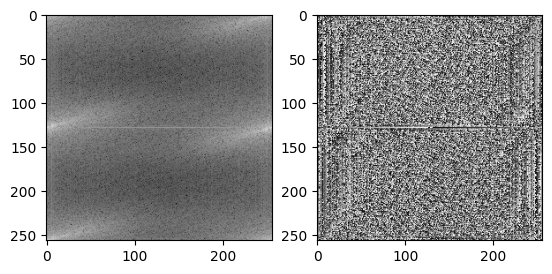

In [12]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


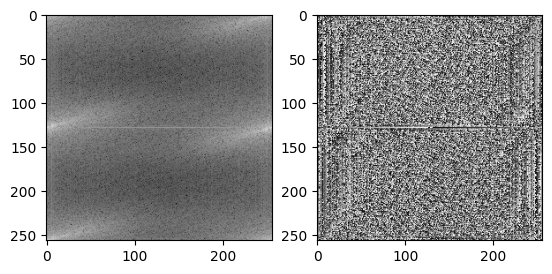

In [16]:
shift_cell_ft = np.fft.fftshift(cell_ft)

shift_amplitude = np.abs(cell_ft)
shift_phase = np.angle(cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(shift_phase, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


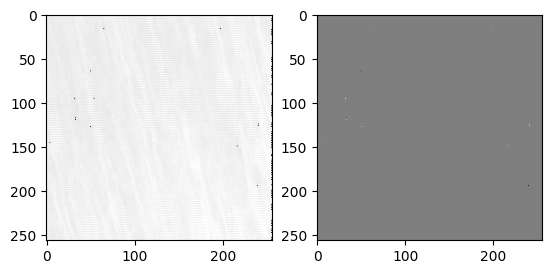

In [20]:
#inverse fourier mit geshiftetem Bild ohne Rückshiftung 
#backshift_cell_ft = np.fft.ifftshift(shift_cell_ft)

#inverse_shift_cell_ft = np.fft.ifft2(backshift_cell_ft)

#inverse_shift_amplitude = np.abs(inverse_shift_cell_ft)
#inverse_shift_phase = np.angle(inverse_shift_cell_ft)


#auf Ursprungsbild 
inverse_cell_ft = np.fft.ifft2(cell_ft)

amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(inverse_shift_amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(inverse_shift_phase, 'gray')


---


**[Task 2 (a).]()** Load the brain CT image.


In [23]:
ct_img = plt.imread('/workspaces/mobi-fs5-python/data/brain_ct.png')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [28]:
ct_ft = np.fft.fft2(ct_img)

ct_amplitude = np.abs(ct_ft)
ct_phase = np.angle(ct_ft)

shift_ct_ft = np.fft.fftshift(ct_ft)

shift_ct_amplitude = np.abs(ct_ft)
shift_ct_phase = np.angle(ct_ft)


In [26]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


In [32]:
#gehirn
c_array_ct = to_complex_array(ct_amplitude, ct_phase)
print(c_array_ct)

[[15684.58865412   +0.j         -5119.53936371+1229.08078733j
  -2000.94953866 -295.35150207j ...   -24.57606924 -465.55197989j
  -2000.94953866 +295.35150207j -5119.53936371-1229.08078733j]
 [-4257.29458937 +343.38812228j  1016.30020887  -24.84867225j
    688.45964518 -634.0130996j  ...   353.5266442  +392.73145938j
   -594.32699015-1053.26301158j  1019.13891546+1569.46921305j]
 [-1082.57465369+2410.85593661j   870.90585489  -81.71018917j
   -215.54714148 -884.92125437j ...  -286.45668649  +99.88732199j
   1343.19131382 -300.61410194j   -54.92285489-1892.28102676j]
 ...
 [ -129.0056972   -84.16425195j   735.98624859 -118.49654149j
   -762.69479604 -171.81493014j ...   110.88181052  -86.70779076j
    543.37757814 +177.27816722j  -305.56122684 +253.35966216j]
 [-1082.57465369-2410.85593661j   -54.92285489+1892.28102676j
   1343.19131382 +300.61410194j ...   -73.59583913 -117.06893669j
   -215.54714148 +884.92125437j   870.90585489  +81.71018917j]
 [-4257.29458937 -343.38812228j  1019.13

**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


In [33]:
#amplitude von zelle, andere gehirn
c_array_ct = to_complex_array(amplitude, ct_phase)
print(c_array_ct)

[[15684.58865412   +0.j         -5119.53936371+1229.08078733j
  -2000.94953866 -295.35150207j ...   -24.57606924 -465.55197989j
  -2000.94953866 +295.35150207j -5119.53936371-1229.08078733j]
 [-4257.29458937 +343.38812228j  1016.30020887  -24.84867225j
    688.45964518 -634.0130996j  ...   353.5266442  +392.73145938j
   -594.32699015-1053.26301158j  1019.13891546+1569.46921305j]
 [-1082.57465369+2410.85593661j   870.90585489  -81.71018917j
   -215.54714148 -884.92125437j ...  -286.45668649  +99.88732199j
   1343.19131382 -300.61410194j   -54.92285489-1892.28102676j]
 ...
 [ -129.0056972   -84.16425195j   735.98624859 -118.49654149j
   -762.69479604 -171.81493014j ...   110.88181052  -86.70779076j
    543.37757814 +177.27816722j  -305.56122684 +253.35966216j]
 [-1082.57465369-2410.85593661j   -54.92285489+1892.28102676j
   1343.19131382 +300.61410194j ...   -73.59583913 -117.06893669j
   -215.54714148 +884.92125437j   870.90585489  +81.71018917j]
 [-4257.29458937 -343.38812228j  1019.13

---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [ ]:
filter_window_size = 50

**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [ ]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
